## T-SNE

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 17, 8
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.manifold import TSNE

The dataset: https://opendata-renewables.engie.com/explore/dataset/01c55756-5cd6-4f60-9f63-2d771bb25a1a/information

In [2]:
df = pd.read_csv('data/la-haute-borne-data-2017-2020.csv', sep=';',header=1)
df_header = pd.read_csv('data/la-haute-borne-data-2017-2020.csv', sep=';',header=None)
#due to a laptop that is not better than a potato we have to sample data so get less data
df1 = df.sample(136)
df2 = df1.values
pd_header = df_header.values
label = pd_header[0]
df2.shape

C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(136, 138)

In [3]:
label = np.delete(label, [0,1])
label.shape

(136,)

In [4]:
df_rdy = np.delete(df2, [0,1], axis=1)
df_rdy.shape

(136, 136)

In [5]:
df_rdy[pd.isnull(df_rdy)] = 0

In [6]:
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(df_rdy)
tsne_result.shape
# (136, 2)

(136, 2)

In [7]:
label.shape

(136,)

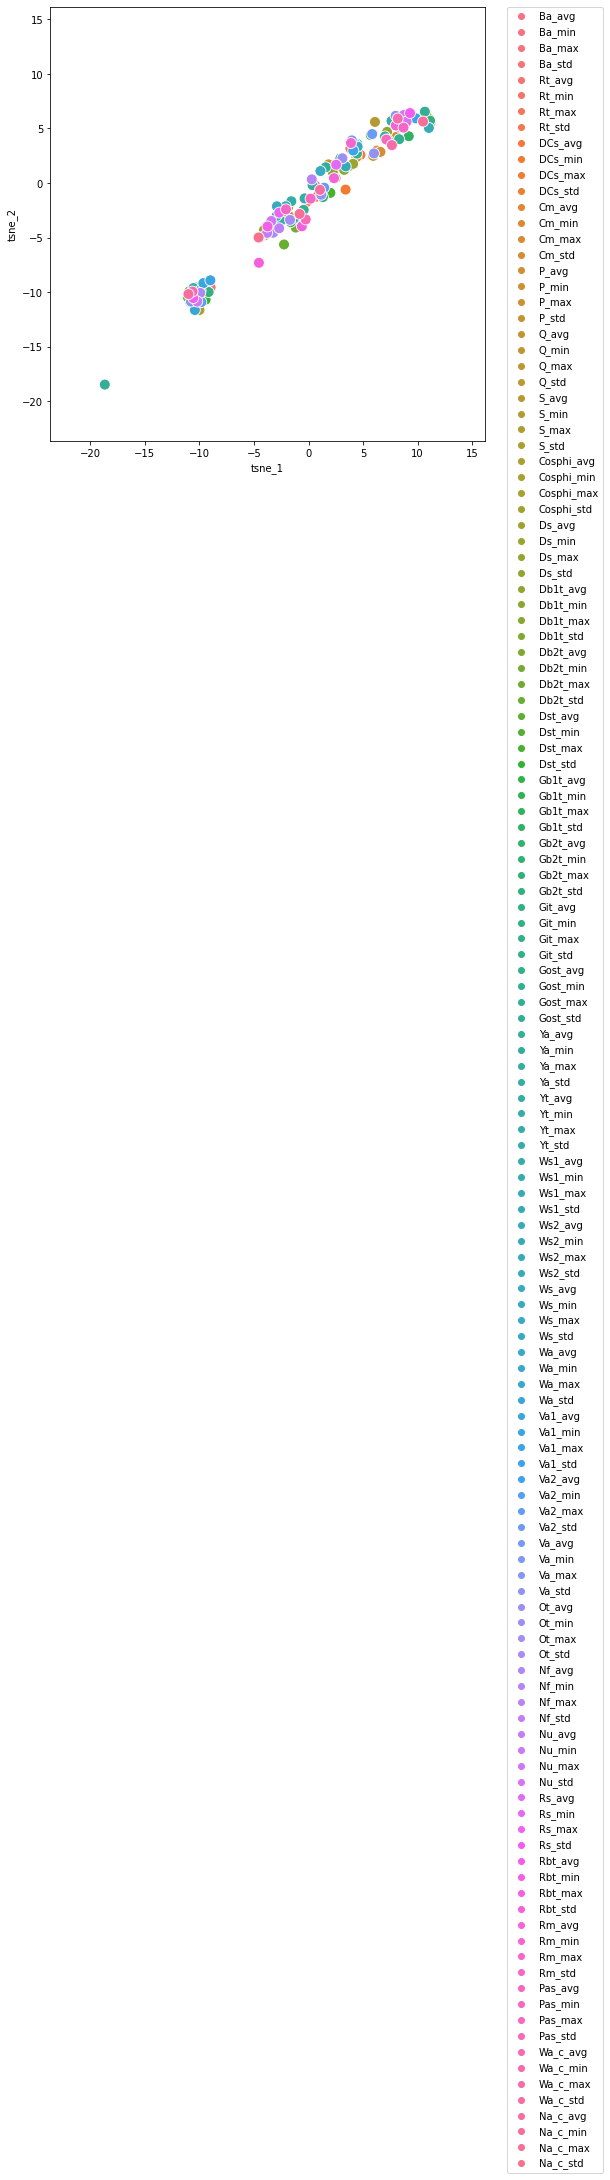

In [8]:
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': label})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)